# <pre><center> TRAINING AND TESTING TITANIC CLASSIFICATION DATASET </center> <br></pre>

<pre>
Name         : trian_and_test.ipynb
Description  : This notebook deals with the training titanic classification dataset and perform inference on test data.
Language     : Python 3.6
Requirements : pandas, numpy, statistics, scikit-learn, utils
Input files  : ../processed_data/train.csv, ../processed_data/test.csv
               These files are obtained from execution of data_preprocessing.ipynb notebook.
Output files : ../submissions/*_submission.csv
</pre>

In [1]:
# Import required packages
import os
import pandas as pd
import numpy as np

from statistics import mode
from sklearn.metrics import accuracy_score, f1_score

In [2]:
# Import user definited utilities

from utils.ml_models import train_ml_models
from utils.utils import plot_progress, get_results_data, get_best_model
from utils.neural_network import CustomNetTrainer

In [3]:
# Input and output path

TRAIN_DATA_PATH = "../processed_data/train.csv"
TEST_DATA_PATH = "../processed_data/test.csv"
OUTPUT_DIR = "../submissions"

In [4]:
# Create output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

## Read the processed data

In [5]:
# Read from processed files

train_data = pd.read_csv(TRAIN_DATA_PATH, index_col="PassengerId")
test_data = pd.read_csv(TEST_DATA_PATH, index_col="PassengerId")

In [6]:
# Get the features and labels from the trianing data
labels = train_data["Survived"].values
features = train_data.drop(["Survived"], axis=1).values

## Train Machine Learning models

In [7]:
# Train ML models on the training data
training_results= train_ml_models(features, labels)

Fold : 4/4: 100%|██████████| 19/19 [00:04<00:00,  4.22it/s]

+--------+------------------+--------------------+---------------------+---------------------+
|  Fold  | Training samples | Validation samples | Samples for class 0 | Samples for class 1 |
+--------+------------------+--------------------+---------------------+---------------------+
| Fold_1 |       668        |        223         |         411         |         257         |
| Fold_2 |       668        |        223         |         412         |         256         |
| Fold_3 |       668        |        223         |         412         |         256         |
| Fold_4 |       669        |        222         |         412         |         257         |
+--------+------------------+--------------------+---------------------+---------------------+


## Train custom neural network

In [8]:
# Train custom neural network on training data
neural_net = CustomNetTrainer()
progress_results, custom_training_results = neural_net.train(features, labels, n_epochs=300)

Fold : 4/4: 100%|██████████| 300/300 [00:06<00:00, 44.24it/s]


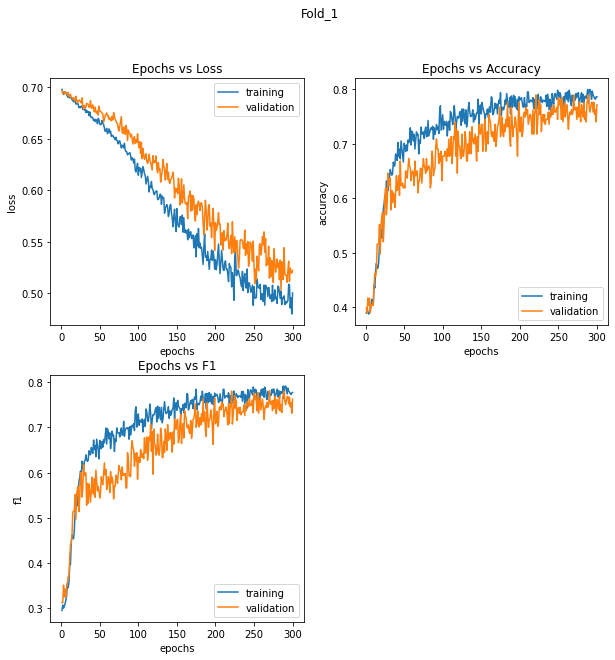

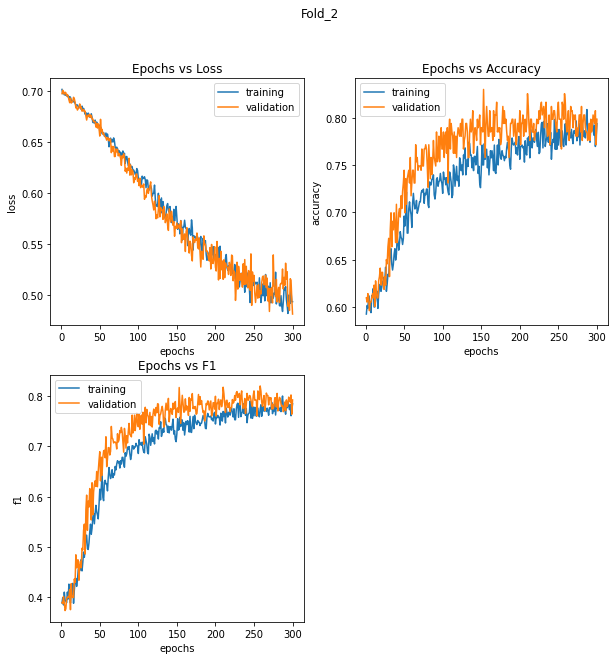

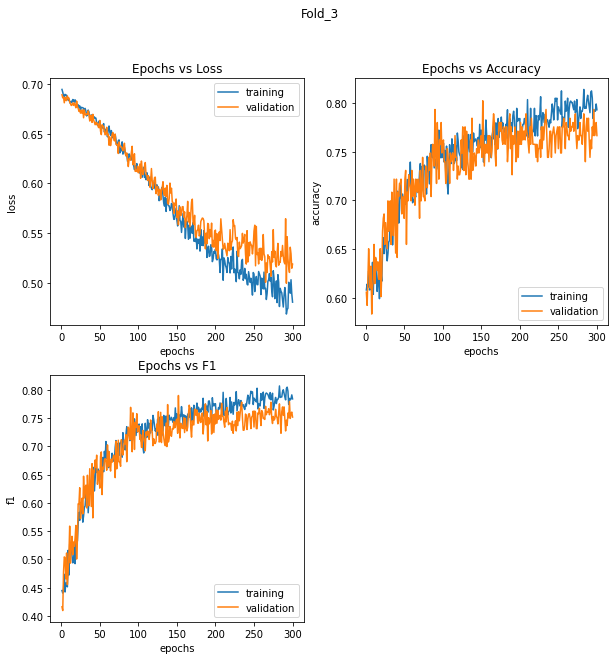

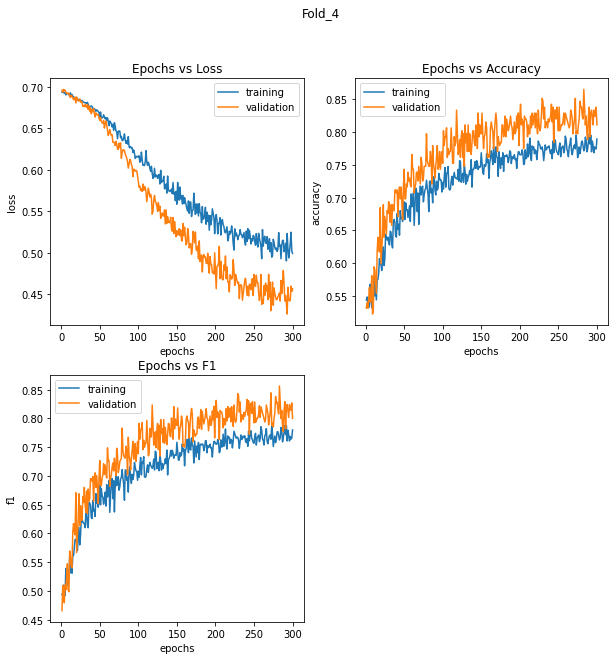

In [9]:
# Plot the neural network training progress
figures = plot_progress(progress_results)

## Training results

In [10]:
# Combining the training results
training_results["CustomNeuralNetwork"] = custom_training_results
training_results_df = get_results_data(training_results)

In [11]:
# Display the training results
training_results_df

,Accuracy score Fold_1,Accuracy score Fold_2,Accuracy score Fold_3,Accuracy score Fold_4,Accuracy score average,F1 score Fold_1,F1 score Fold_2,F1 score Fold_3,F1 score Fold_4,F1 score average,F1 score for class 0 Fold_1,F1 score for class 0 Fold_2,F1 score for class 0 Fold_3,F1 score for class 0 Fold_4,F1 score for class 0 average,F1 score for class 1 Fold_1,F1 score for class 1 Fold_2,F1 score for class 1 Fold_3,F1 score for class 1 Fold_4,F1 score for class 1 average
LogisticRegression,0.771300,0.789238,0.766816,0.792793,0.780037,0.762036,0.784222,0.753947,0.782631,0.770709,0.808989,0.817121,0.810219,0.829630,0.816489,0.715084,0.751323,0.697674,0.735632,0.724928
GaussianNB,0.713004,0.789238,0.789238,0.801802,0.773320,0.688112,0.780700,0.773946,0.785035,0.756948,0.776224,0.823970,0.832740,0.845070,0.819501,0.600000,0.737430,0.715152,0.725000,0.694395
BernouliNB,0.721973,0.802691,0.771300,0.761261,0.764306,0.709049,0.794315,0.752141,0.744412,0.749979,0.770370,0.835821,0.821053,0.810036,0.809320,0.647727,0.752809,0.683230,0.678788,0.690638
KNeighborsClassifier,0.753363,0.798206,0.807175,0.797297,0.789010,0.728079,0.790032,0.788663,0.774202,0.770244,0.810997,0.831461,0.851211,0.846416,0.835021,0.645161,0.748603,0.726115,0.701987,0.705467
DecisionTreeClassifier,0.730942,0.789238,0.780269,0.752252,0.763175,0.717292,0.782935,0.760546,0.740627,0.750350,0.779412,0.819923,0.829268,0.795539,0.806036,0.655172,0.745946,0.691824,0.685714,0.694664
BaggingClassifier,0.762332,0.843049,0.811659,0.779279,0.799080,0.742421,0.831662,0.794172,0.765939,0.783548,0.814035,0.875445,0.854167,0.821818,0.841366,0.670807,0.787879,0.734177,0.710059,0.725731
RandomForestClassifier,0.762332,0.838565,0.811659,0.806306,0.804716,0.739515,0.828900,0.795323,0.793640,0.789345,0.816609,0.869565,0.853147,0.844765,0.846022,0.662420,0.788235,0.737500,0.742515,0.732668
AdaBoostClassifier,0.780269,0.829596,0.798206,0.851351,0.814856,0.771368,0.821675,0.778833,0.840860,0.803184,0.816479,0.859259,0.844291,0.881720,0.850437,0.726257,0.784091,0.713376,0.800000,0.755931
LGBMClassifier,0.784753,0.829596,0.834081,0.815315,0.815936,0.771867,0.821675,0.822042,0.805857,0.805360,0.826087,0.859259,0.868327,0.848708,0.850596,0.717647,0.784091,0.775758,0.763006,0.760125
XGBClassifier,0.780269,0.843049,0.829596,0.801802,0.813679,0.765480,0.834024,0.816770,0.789337,0.801403,0.824373,0.872727,0.865248,0.840580,0.850732,0.706587,0.795322,0.768293,0.738095,0.752074


## Best Models

In [12]:
# Get the best models based on criteria
best_models = get_best_model(training_results_df)

In [13]:
# Display the results of best models
training_results_df.loc[best_models]

,Accuracy score Fold_1,Accuracy score Fold_2,Accuracy score Fold_3,Accuracy score Fold_4,Accuracy score average,F1 score Fold_1,F1 score Fold_2,F1 score Fold_3,F1 score Fold_4,F1 score average,F1 score for class 0 Fold_1,F1 score for class 0 Fold_2,F1 score for class 0 Fold_3,F1 score for class 0 Fold_4,F1 score for class 0 average,F1 score for class 1 Fold_1,F1 score for class 1 Fold_2,F1 score for class 1 Fold_3,F1 score for class 1 Fold_4,F1 score for class 1 average
RandomForestClassifier,0.762332,0.838565,0.811659,0.806306,0.804716,0.739515,0.828900,0.795323,0.793640,0.789345,0.816609,0.869565,0.853147,0.844765,0.846022,0.662420,0.788235,0.737500,0.742515,0.732668
AdaBoostClassifier,0.780269,0.829596,0.798206,0.851351,0.814856,0.771368,0.821675,0.778833,0.840860,0.803184,0.816479,0.859259,0.844291,0.881720,0.850437,0.726257,0.784091,0.713376,0.800000,0.755931
LGBMClassifier,0.784753,0.829596,0.834081,0.815315,0.815936,0.771867,0.821675,0.822042,0.805857,0.805360,0.826087,0.859259,0.868327,0.848708,0.850596,0.717647,0.784091,0.775758,0.763006,0.760125
XGBClassifier,0.780269,0.843049,0.829596,0.801802,0.813679,0.765480,0.834024,0.816770,0.789337,0.801403,0.824373,0.872727,0.865248,0.840580,0.850732,0.706587,0.795322,0.768293,0.738095,0.752074
SVC,0.793722,0.820628,0.798206,0.842342,0.813725,0.783257,0.814352,0.778833,0.829467,0.801477,0.830882,0.848485,0.844291,0.876325,0.849996,0.735632,0.780220,0.713376,0.782609,0.752959
MLPClassifier,0.775785,0.838565,0.793722,0.842342,0.812604,0.762361,0.828109,0.777039,0.831215,0.799681,0.818841,0.870504,0.838028,0.874552,0.850481,0.705882,0.785714,0.716049,0.787879,0.748881


## Testing best model

In [17]:
for model in best_models:
    all_predictions = []
    for fold in training_results[model]:
        cur_model = training_results[model][fold]["model"]
        predictions = cur_model.predict(test_data.values)
        all_predictions.append(predictions)
    predictions = []
    for sample in np.asarray(all_predictions).T:
        predictions.append(mode(sample))

    out_df = pd.DataFrame({"PassengerId" : test_data.index, "Survived" : predictions})
    out_df.to_csv(os.path.join(OUTPUT_DIR, model + "_submission.csv"), index=None)

    print("Saving results of {}".format(model))

Saving results of RandomForestClassifier
Saving results of AdaBoostClassifier
Saving results of LGBMClassifier
Saving results of XGBClassifier
Saving results of SVC
Saving results of MLPClassifier
